## Sparse Attention

Sparse Causal Mask (block_size=16, fixed_positions=4):
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1]]
Heatmap saved to sparse_causal_mask.png


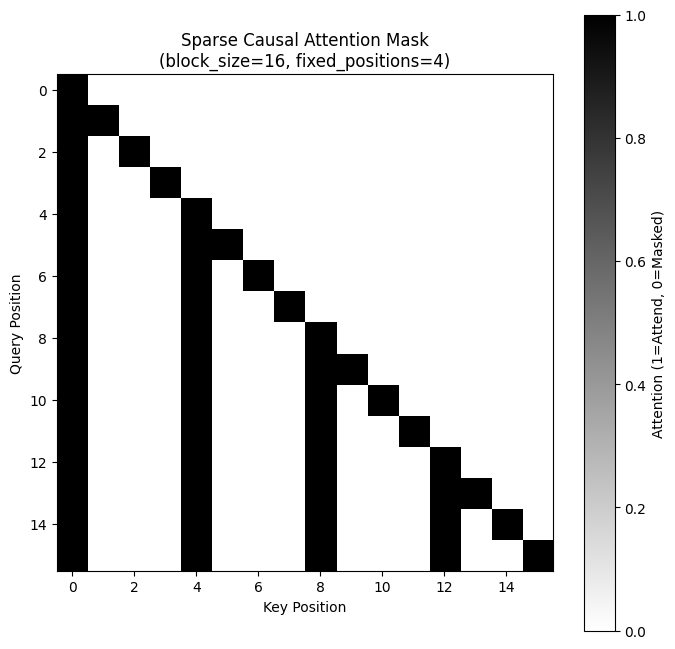

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def generate_sparse_causal_mask(block_size, fixed_positions, visualize=False, save_path=None):
    """
    Generate and optionally visualize a sparse causal attention mask with fixed positions.

    Parameters:
    - block_size (int): Size of the attention matrix (sequence length).
    - fixed_positions (int): Number of fixed positions to attend to.
    - visualize (bool): If True, plot the mask as a heatmap.
    - save_path (str, optional): Path to save the heatmap image.

    Returns:
    - mask (np.ndarray): Boolean attention mask of shape (block_size, block_size).
    """
    # Create the mask using the provided logic
    mask = torch.zeros(block_size, block_size)
    step = max(1, block_size // fixed_positions)
    fixed_indices = list(range(0, block_size, step))[:fixed_positions]
    for i in range(block_size):
        mask[i, i] = 1  # Attend to self
        for j in fixed_indices:
            if j <= i:
                mask[i, j] = 1
    mask = mask.bool()

    # Convert to NumPy for printing
    mask_np = mask.numpy()

    # Print mask for inspection
    print(f"Sparse Causal Mask (block_size={block_size}, fixed_positions={fixed_positions}):")
    print(mask_np.astype(int))

    # Visualize mask if requested
    if visualize:
        plt.figure(figsize=(8, 8))
        plt.imshow(mask_np, cmap='binary', interpolation='nearest')
        plt.title(f"Sparse Causal Attention Mask\n(block_size={block_size}, fixed_positions={fixed_positions})")
        plt.xlabel("Key Position")
        plt.ylabel("Query Position")
        plt.colorbar(label="Attention (1=Attend, 0=Masked)")
        if save_path:
            plt.savefig(save_path)
            print(f"Heatmap saved to {save_path}")
        plt.show()

    return mask_np

# Example usage
if __name__ == "__main__":
    # Sample parameters
    block_size = 16
    fixed_positions = 4

    mask = generate_sparse_causal_mask(
        block_size=block_size,
        fixed_positions=fixed_positions,
        visualize=True,
        save_path="sparse_causal_mask.png"
    )

Generated multi-head attention mask:
Head 0:
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0]
 [0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0]
 [0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0]
 [0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0]
 [0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1]]
Head 1:
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0]
 [1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0]

C:\Users\teeds\AppData\Local\Temp\ipykernel_199572\2204591983.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Heatmaps saved to fixed_attention_mask_all_heads.png


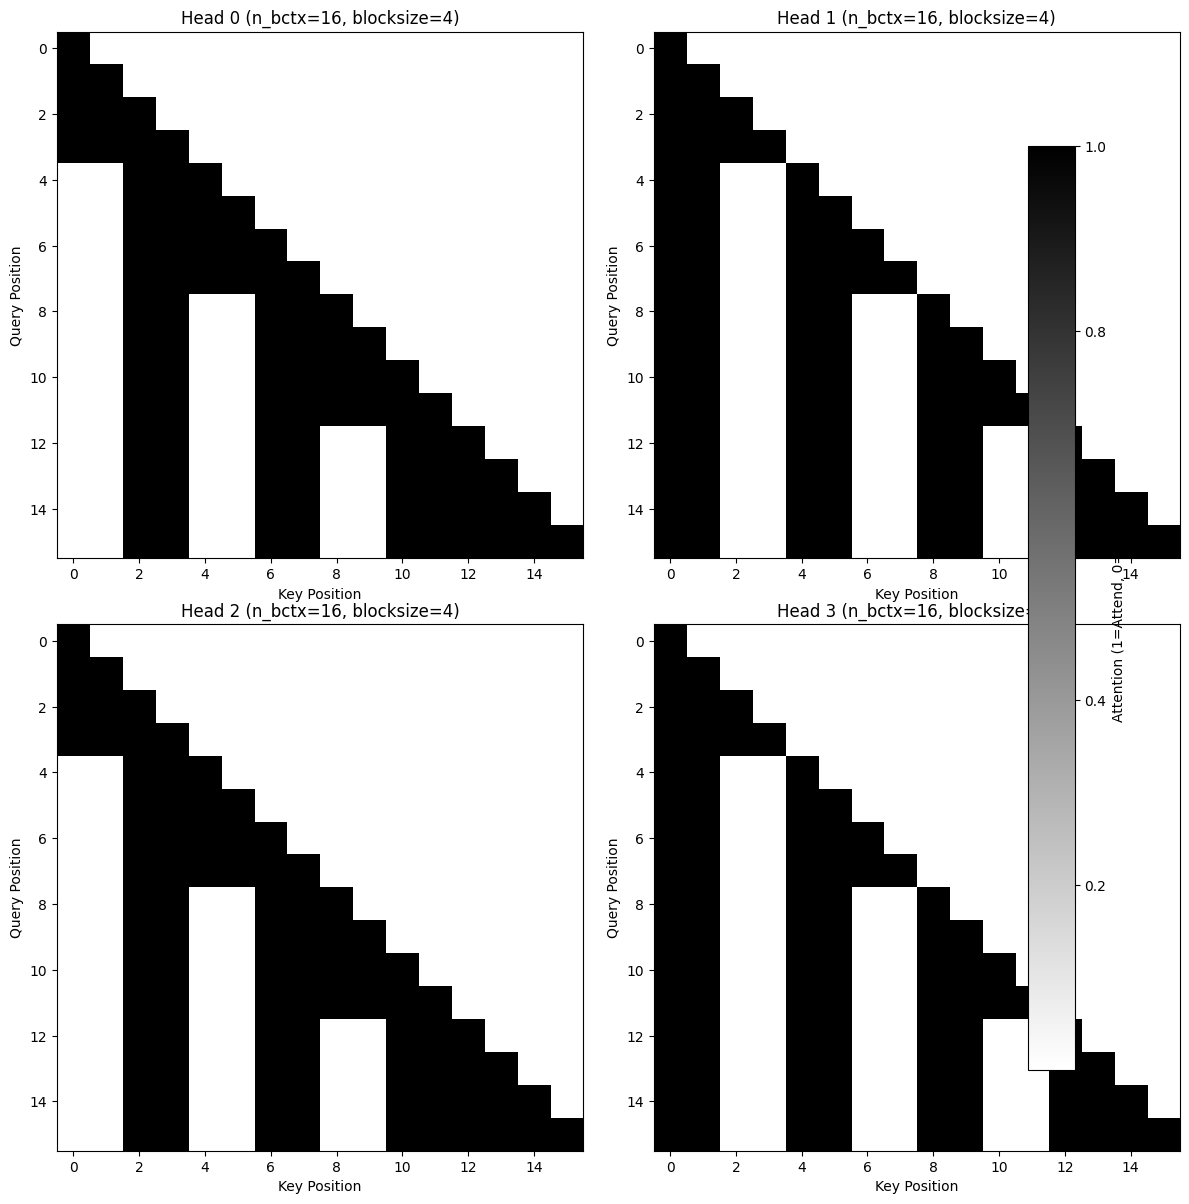

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_fixed_attention_mask(n_heads, num_verts, local_attn_ctx, blocksize, vertsize, n_bctx, visualize=False, save_path=None):
    """
    Generate and optionally visualize a fixed sparse attention mask for all heads.

    Parameters:
    - n_heads (int): Number of attention heads.
    - num_verts (int): Number of vertical splits for attention pattern.
    - local_attn_ctx (int): Local attention context size.
    - blocksize (int): Size of blocks for local attention (forms 'smaller triangles').
    - vertsize (int): Size of vertical chunks for fixed positions.
    - n_bctx (int): Block context size (sequence length for attention).
    
    Returns:
    - layout (np.ndarray): Attention mask(s) as boolean array(s). Shape is (n_bctx, n_bctx) for num_verts=1,
      or (n_heads, n_bctx, n_bctx) for num_verts>1.
    """
    # Validate parameters
    if n_heads % num_verts != 0:
        raise ValueError("n_heads must be divisible by num_verts")
    stride = local_attn_ctx // blocksize
    if vertsize > stride:
        raise ValueError("vertsize must be <= stride")
    if stride % vertsize != 0:
        raise ValueError("stride must be divisible by vertsize")

    # Generate indices for fixed attention pattern
    indices = [i for i in range(stride - 1, -1, -1)]
    indices = np.array(indices).reshape([-1, vertsize])

    if num_verts == 1:
        # Single mask for all heads
        layout = np.zeros([n_bctx, n_bctx], dtype=np.bool_)
        for idx in indices[0]:
            layout[:, idx::stride] = 1
        for q_idx in range(n_bctx):
            # Local block attention (smaller triangles)
            row = q_idx // stride
            layout[q_idx, row * stride:(row + 1) * stride] = 1
            # Enforce causality
            layout[q_idx, q_idx + 1:] = 0
    else:
        # Multiple masks, one per head
        layouts = []
        indices = indices[:num_verts]
        for h in range(n_heads):
            layout = np.zeros([n_bctx, n_bctx], dtype=np.bool_)
            subindices = indices[h % num_verts]
            for idx in subindices:
                layout[:, idx::stride] = 1
            for q_idx in range(n_bctx):
                # Local block attention (smaller triangles)
                row = q_idx // stride
                layout[q_idx, row * stride:(row + 1) * stride] = 1
                # Enforce causality
                layout[q_idx, q_idx + 1:] = 0
            layouts.append(layout)
        layout = np.array(layouts)
    return layout

# Example usage
if __name__ == "__main__":
    # Sample parameters
    n_heads = 4
    num_verts = 2
    local_attn_ctx = 16
    blocksize = 4
    vertsize = 2
    n_bctx = 16

    mask = generate_fixed_attention_mask(
        n_heads=n_heads,
        num_verts=num_verts,
        local_attn_ctx=local_attn_ctx,
        blocksize=blocksize,
        vertsize=vertsize,
        n_bctx=n_bctx,
        visualize=True,
        save_path="fixed_attention_mask_all_heads.png"
    )

In [18]:
vertsize = 2
stride = local_attn_ctx // blocksize
local_attn_ctx = 16
blocksize = 4
indices = [i for i in range(stride - 1, -1, -1)]
indices = np.array(indices).reshape([-1, vertsize])


In [19]:
indices

array([[3, 2],
       [1, 0]])

Sparse Causal Mask (block_size=16, fixed_positions=4):
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1]]
Heatmap saved to sparse_causal_mask.png


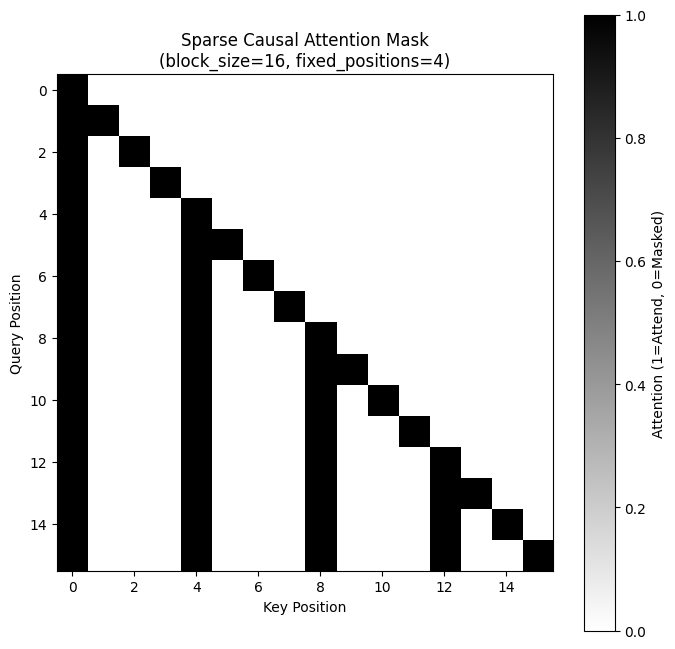

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def generate_sparse_causal_mask(block_size, fixed_positions, visualize=False, save_path=None):
    """
    Generate and optionally visualize a sparse causal attention mask with fixed positions.

    Parameters:
    - block_size (int): Size of the attention matrix (sequence length).
    - fixed_positions (int): Number of fixed positions to attend to.
    - visualize (bool): If True, plot the mask as a heatmap.
    - save_path (str, optional): Path to save the heatmap image.

    Returns:
    - mask (np.ndarray): Boolean attention mask of shape (block_size, block_size).
    """
    # Create the mask using the provided logic
    mask = torch.zeros(block_size, block_size)
    step = max(1, block_size // fixed_positions)
    fixed_indices = list(range(0, block_size, step))[:fixed_positions]
    for i in range(block_size):
        mask[i, i] = 1  # Attend to self
        for j in fixed_indices:
            if j <= i:
                mask[i, j] = 1
    mask = mask.bool()

    # Convert to NumPy for printing
    mask_np = mask.numpy()

    # Print mask for inspection
    print(f"Sparse Causal Mask (block_size={block_size}, fixed_positions={fixed_positions}):")
    print(mask_np.astype(int))

    # Visualize mask if requested
    if visualize:
        plt.figure(figsize=(8, 8))
        plt.imshow(mask_np, cmap='binary', interpolation='nearest')
        plt.title(f"Sparse Causal Attention Mask\n(block_size={block_size}, fixed_positions={fixed_positions})")
        plt.xlabel("Key Position")
        plt.ylabel("Query Position")
        plt.colorbar(label="Attention (1=Attend, 0=Masked)")
        if save_path:
            plt.savefig(save_path)
            print(f"Heatmap saved to {save_path}")
        plt.show()

    return mask_np

# Example usage
if __name__ == "__main__":
    # Sample parameters
    block_size = 16
    fixed_positions = 4

    mask = generate_sparse_causal_mask(
        block_size=block_size,
        fixed_positions=fixed_positions,
        visualize=True,
        save_path="sparse_causal_mask.png"
    )

Sparse Causal Mask (block_size=16, fixed_positions=4, blocksize=4):
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1]]
Heatmap saved to sparse_causal_mask_with_blocks.png


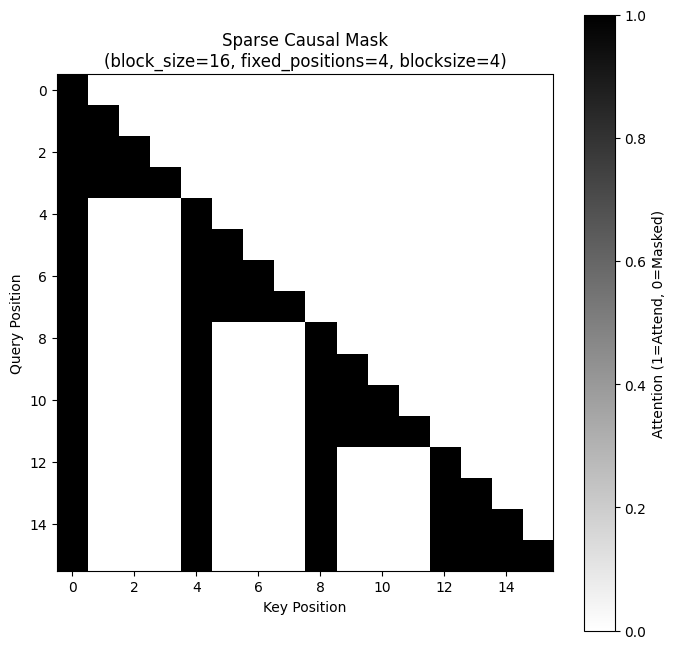

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def generate_sparse_causal_mask_with_blocks(block_size, fixed_positions, blocksize, local_attn_ctx, visualize=False, save_path=None):
    """
    Generate a sparse causal attention mask with fixed positions and local blocks.

    Parameters:
    - block_size (int): Size of the attention matrix (sequence length).
    - fixed_positions (int): Number of fixed positions to attend to.
    - blocksize (int): Size of local attention blocks.
    - local_attn_ctx (int): Local attention context size for stride.
    - visualize (bool): If True, plot the mask as a heatmap.
    - save_path (str, optional): Path to save the heatmap image.

    Returns:
    - mask (np.ndarray): Boolean attention mask of shape (block_size, block_size).
    """
    stride = local_attn_ctx // blocksize
    mask = torch.zeros(block_size, block_size)
    step = max(1, block_size // fixed_positions)
    fixed_indices = list(range(0, block_size, step))[:fixed_positions]
    for i in range(block_size):
        # Self-attention
        mask[i, i] = 1
        # Fixed positions (causal)
        for j in fixed_indices:
            if j <= i:
                mask[i, j] = 1
        # Local block attention
        row = i // stride
        mask[i, row * stride:min((row + 1) * stride, i + 1)] = 1  # Causal constraint

    mask = mask.bool()
    mask_np = mask.numpy()

    print(f"Sparse Causal Mask (block_size={block_size}, fixed_positions={fixed_positions}, blocksize={blocksize}):")
    print(mask_np.astype(int))

    if visualize:
        plt.figure(figsize=(8, 8))
        plt.imshow(mask_np, cmap='binary', interpolation='nearest')
        plt.title(f"Sparse Causal Mask\n(block_size={block_size}, fixed_positions={fixed_positions}, blocksize={blocksize})")
        plt.xlabel("Key Position")
        plt.ylabel("Query Position")
        plt.colorbar(label="Attention (1=Attend, 0=Masked)")
        if save_path:
            plt.savefig(save_path)
            print(f"Heatmap saved to {save_path}")
        plt.show()

    return mask_np

# Example usage
if __name__ == "__main__":
    mask = generate_sparse_causal_mask_with_blocks(
        block_size=16,
        fixed_positions=4,
        blocksize=4,
        local_attn_ctx=16,
        visualize=True,
        save_path="sparse_causal_mask_with_blocks.png"
    )

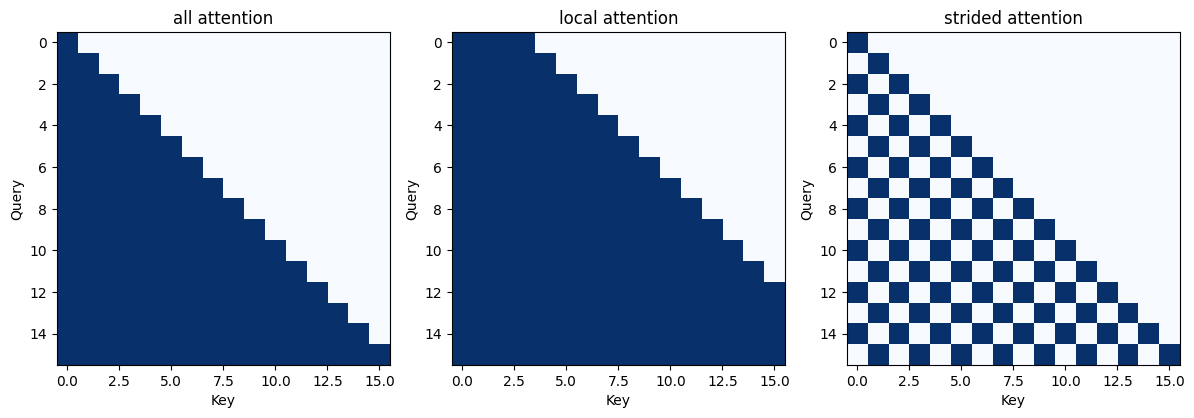

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def get_attn_mask_np(n, attn_mode, local_attn_ctx=None, stride=None):
    if attn_mode == 'all':
        b = np.tril(np.ones((n, n), dtype=np.float32))
    elif attn_mode == 'local':
        bandwidth = local_attn_ctx
        ctx = min(n-1, bandwidth-1)
        b = np.tril(np.ones((n, n), dtype=np.float32), k=ctx)
    elif attn_mode == 'strided':
        s = stride
        x = np.arange(n).reshape(n, 1)
        y = np.arange(n).reshape(1, n)
        c1 = x >= y
        c2 = (x - y) % s == 0
        b = np.logical_and(c1, c2).astype(np.float32)
    else:
        raise ValueError('Not implemented')
    return b

# Visualization
n = 16
modes = ['all', 'local', 'strided']
local_ctx = 4
stride_val = 2

plt.figure(figsize=(12, 4))
for i, mode in enumerate(modes):
    if mode == 'local':
        mask = get_attn_mask_np(n, mode, local_ctx)
    elif mode == 'strided':
        mask = get_attn_mask_np(n, mode, stride=stride_val)
    else:
        mask = get_attn_mask_np(n, mode)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(mask, cmap='Blues')
    plt.title(f'{mode} attention')
    plt.xlabel('Key')
    plt.ylabel('Query')
plt.tight_layout()
plt.show()


bT_ctx: 8, blocksize: 4


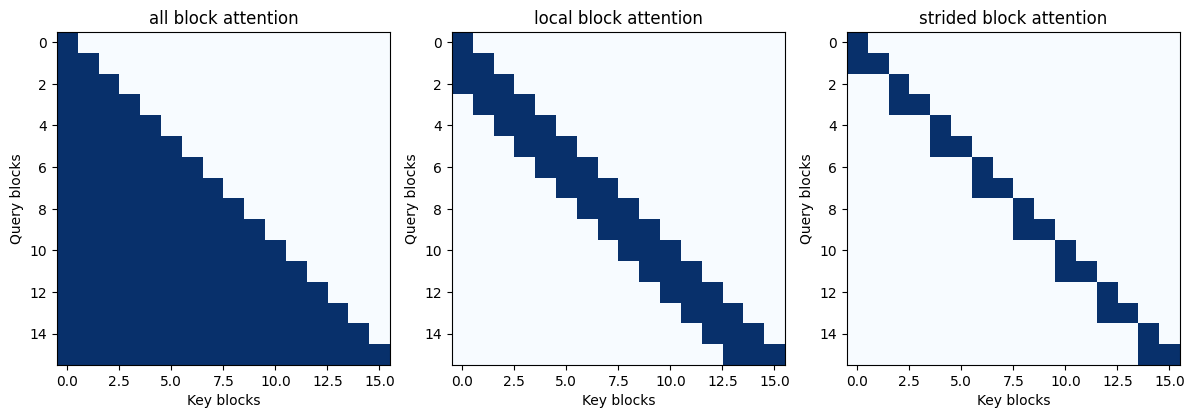

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def get_block_layout(n_ctx, blocksize, attn_mode, local_attn_ctx=None, n_heads=1, num_verts=1, vertsize=None):
    n_bctx = n_ctx // blocksize
    layout = np.ones([n_bctx, n_bctx], dtype=np.bool)
    extra_diagonals = None
    block_chunks = None

    if attn_mode in ['all', 'fixed']:
        pass
    elif attn_mode == 'local':
        assert local_attn_ctx % blocksize == 0
        extra_diagonals = local_attn_ctx // blocksize
    elif attn_mode == 'strided':
        bT_ctx = n_ctx // local_attn_ctx
        print(f'bT_ctx: {bT_ctx}, blocksize: {blocksize}')
        assert bT_ctx % blocksize == 0
        block_chunks = bT_ctx // blocksize
    else:
        raise ValueError(f'attn mode {attn_mode} invalid')

    if attn_mode == 'fixed':
        assert n_heads % num_verts == 0
        lctx = local_attn_ctx
        stride = lctx // blocksize
        assert vertsize <= stride
        assert stride % vertsize == 0
        indices = [i for i in range(stride - 1, -1, -1)]
        indices = np.array(indices).reshape([-1, vertsize])
        layouts = []
        indices = indices[:num_verts]
        for h in range(n_heads):
            layout = np.zeros([n_bctx, n_bctx], dtype=np.bool)
            subindices = indices[h % num_verts]
            for idx in subindices:
                layout[:, idx::stride] = 1
            for q_idx in range(n_bctx):
                row = q_idx // stride
                layout[q_idx, row * stride:(row + 1) * stride] = 1
                layout[q_idx, q_idx + 1:] = 0
            layouts.append(layout)
        layout = np.array(layouts)
    else:
        for q_idx, k_idx in np.ndindex(n_bctx, n_bctx):
            if k_idx > q_idx:
                layout[q_idx, k_idx] = 0
            if extra_diagonals and k_idx + extra_diagonals < q_idx:
                layout[q_idx, k_idx] = 0
            if block_chunks is not None:
                layout[q_idx, k_idx] = 0
                offset = q_idx % block_chunks
                if k_idx + offset >= q_idx and k_idx <= q_idx:
                    layout[q_idx, k_idx] = 1

    return layout

# -----------------------
# Visualization
# -----------------------
n_ctx = 64
blocksize = 4
local_attn_ctx = 8
stride = 2

modes = ['all', 'local', 'strided']
plt.figure(figsize=(12, 4))

for i, mode in enumerate(modes):
    if mode == 'local':
        mask = get_block_layout(n_ctx, blocksize, mode, local_attn_ctx=local_attn_ctx)
    elif mode == 'strided':
        mask = get_block_layout(n_ctx, blocksize, mode, local_attn_ctx=local_attn_ctx)
    else:
        mask = get_block_layout(n_ctx, blocksize, mode)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(mask, cmap='Blues', origin='upper')
    plt.title(f'{mode} block attention')
    plt.xlabel('Key blocks')
    plt.ylabel('Query blocks')

plt.tight_layout()
plt.show()


## Sparse K attention

### The differentiable SparseK Operator

![Sparse Attention](./asset/SparseKimage.png)



In [67]:
import torch

dtype = torch.float32 
BATCH = 4
SEQ = 10
DIM = 2
# (BATCH X SEQ X DIM)

q = torch.randn(BATCH, SEQ, DIM, dtype=dtype)
k = torch.randn(BATCH, SEQ, DIM, dtype=dtype)
v = torch.randn(BATCH, SEQ, DIM, dtype=dtype)

# (BATCH X SEQ)

u = torch.randn(BATCH, SEQ , dtype=dtype)

print(u)

tensor([[ 0.2288, -1.1435,  1.9382, -0.5696,  0.3279, -1.7737, -0.2007, -0.1689,
          0.4044,  0.4183],
        [-1.2886, -2.0514, -1.0704, -0.7844,  0.8003,  1.5138, -0.2388,  0.1053,
         -0.0045, -1.3491],
        [ 0.7276, -0.9386, -0.5787, -0.3964,  0.4217, -0.2008,  2.0225,  0.8267,
          1.1471,  0.5490],
        [-0.6951, -0.9731,  2.2191, -0.2450, -0.4945,  0.8800,  0.4788, -0.9677,
          0.3949, -1.4520]])


In [72]:
def topk_mask(u, k):
    """
    u: (B, T) importance scores up to current position i
    k: number of key-value pairs to select
    returns: m_topk: binary mask (B, T)
    """
    B, T = u.shape
    m_topk = torch.zeros_like(u, dtype=torch.float32)

    # select top-k indices
    topk_vals, topk_idx = torch.topk(u, min(k, T), dim=1)
    m_topk[torch.arange(B).unsqueeze(1), topk_idx] = 1.0
    return m_topk


tkmasking = topk_mask(u, 5)
print(tkmasking)

tensor([[1., 0., 1., 0., 1., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [1., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 0., 1., 1., 0., 1., 0.]])


In [73]:

def hard_selection_matrix(m_topk):
    """
    m_topk: (B, T) binary mask
    returns: Ahard: (B, k, T) selection matrix
    """
    B, T = m_topk.shape
    k = int(m_topk.sum(dim=1).max())  # number of 1s per batch, can pad if needed
    Ahard = torch.zeros(B, k, T, device=m_topk.device)
    
    for b in range(B):
        idx = m_topk[b].nonzero(as_tuple=False).squeeze(-1)  # positions of top-k
        for i, pos in enumerate(idx):
            Ahard[b, i, pos] = 1.0
    return Ahard


print(hard_selection_matrix(tkmasking))

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],

        [[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0.,

In [9]:
def select(w_score, X, epilson):
        B, T ,C = X.shape
        # shape: (1, T, 1), broadcastable to (B, T, 1)
        pos = torch.arange(1, T + 1, device=X.device, dtype=X.dtype).unsqueeze(0).unsqueeze(-1)
        u = w_score(X) + epilson * pos
        return u.squeeze(-1)   # (B, T )
    



def topk_mask(u, k):
    """
    u: (B, T) importance scores up to current position i
    k: number of key-value pairs to select
    returns: m_topk: binary mask (B, T)
    """
    B, T = u.shape
    m_topk = torch.zeros_like(u, dtype=torch.float32)

    # select top-k indices
    topk_vals, topk_idx = torch.topk(u, min(k, T), dim=1)
    m_topk[torch.arange(B).unsqueeze(1), topk_idx] = 1.0
    return m_topk

def hard_selection_matrix(m_topk):
    """
    m_topk: (B, T) binary mask
    returns: Ahard: (B, k, T) selection matrix
    """
    B, T = m_topk.shape
    k = int(m_topk.sum(dim=1).max())  # number of 1s per batch, can pad if needed
    Ahard = torch.zeros(B, k, T, device=m_topk.device)
    
    for b in range(B):
        idx = m_topk[b].nonzero(as_tuple=False).squeeze(-1)  # positions of top-k
        for i, pos in enumerate(idx):
            Ahard[b, i, pos] = 1.0
    return Ahard


def threshold_function(u):
    pass


In [ ]:
def sparseK(u, k):
    B, T = u.shape  # no last dimension
    z_sorted, _ = torch.sort(u, dim=1, descending=True)  # (B, T)
    z_cumsum = torch.cumsum(z_sorted, dim=1)  # (B, T)

    # candidates: z and z-1
    beta_candidates = torch.cat([z_sorted, z_sorted - 1], dim=1)  # (B, 2*T)
    beta_sorted, _ = torch.sort(beta_candidates, dim=1, descending=True)

    # placeholder for tau
    tau = torch.zeros(B, device=u.device)
    done = torch.zeros(B, dtype=torch.bool, device=u.device)

    for i in range(beta_sorted.shape[1]):
        beta = beta_sorted[:, i]
        print("_____________________ITER________________")
        print(z_sorted.shape)
        print(beta.shape)
        # u_idx and w_idx per batch
        u_idx = (z_sorted >= (beta + 1)).float().cumsum(dim=1).argmax(dim=1)
        w_idx = (z_sorted > beta).float().cumsum(dim=1).argmax(dim=1)

        batch_idx = torch.arange(B)
        tau_candidate = ((z_cumsum[batch_idx, w_idx] - z_cumsum[batch_idx, u_idx]) + u_idx - k) / (w_idx - u_idx).float()

        cond = (z_sorted[batch_idx, w_idx] > tau_candidate) & (z_sorted[batch_idx, u_idx] >= tau_candidate + 1)
        tau[~done & cond] = tau_candidate[~done & cond]
        done = done | cond

        if done.all():
            break

    # compute p
    p = torch.clamp(z_sorted - tau[:, None], 0, 1)  # output shape (B, T)
    return p


In [26]:
def sparseK(u, k):
    B, T = u.shape
    z_sorted, _ = torch.sort(u, dim=1, descending=True)  # (B, T, 1)
    z_cumsum = torch.cumsum(z_sorted, dim=1).squeeze(-1)  # (B, T, 1)
    z_flat = z_sorted.squeeze(-1)  # (B, T)

    # candidates: z and z-1
    beta_candidates = torch.cat([z_flat, z_flat - 1], dim=1)  # (B, 2*T)
    beta_sorted, _ = torch.sort(beta_candidates, dim=1, descending=True)

    # prepare tau placeholder
    tau = torch.zeros(B, device=u.device)

    # mask to keep track of which batches are done
    done = torch.zeros(B, dtype=torch.bool, device=u.device)

    # loop over beta
    for i in range(beta_sorted.shape[1]):
        beta = beta_sorted[:, i]  # (B,)
        
        print("_____________________ITER________________")
        print(z_flat.shape)
        print(beta.shape)
        # u_idx, w_idx per batch
        u_idx = (z_flat >= (beta + 1)).float().cumsum(dim=1).argmax(dim=1)
        w_idx = (z_flat > beta).float().cumsum(dim=1).argmax(dim=1)

        batch_idx = torch.arange(B)
        tau_candidate = ((z_cumsum[batch_idx, w_idx].squeeze(-1) - z_cumsum[batch_idx, u_idx].squeeze(-1)) + u_idx - k) / (w_idx - u_idx).float()

        # condition per batch
        cond = (z_flat[batch_idx, w_idx] > tau_candidate) & (z_flat[batch_idx, u_idx] >= tau_candidate + 1)

        # update tau only for batches not done yet
        tau[~done & cond] = tau_candidate[~done & cond]
        done = done | cond  # mark batches that are done

        if done.all():
            break

    # compute p per batch
    p = torch.clamp(z_sorted - tau[:, None, None], 0, 1)
    return p


In [58]:
import torch

def sparseK(u, k):
    B, T = u.shape
    z_sorted, _ = torch.sort(u, dim=1, descending=True)  # (B, T)
    z_cumsum = torch.cumsum(z_sorted, dim=1)  # (B, T)

    # candidates: z and z-1
    beta_candidates = torch.cat([z_sorted, z_sorted - 1], dim=1)  # (B, 2*T)
    beta_sorted, _ = torch.sort(beta_candidates, dim=1, descending=True)

    tau = torch.zeros(B, device=u.device)
    done = torch.zeros(B, dtype=torch.bool, device=u.device)
    p = None

    batch_idx = torch.arange(B, device=u.device)

    print("Input u:\n", u)
    print("Sorted z:\n", z_sorted)
    print("Cumsum z:\n", z_cumsum)
    print("Beta candidates shape:", beta_candidates.shape)
    print("Beta sorted shape:", beta_sorted.shape)

    for i in range(beta_sorted.shape[1]):
        beta = beta_sorted[:, i][:, None]  # (B, 1)

        # indices
        u_idx = (z_sorted >= (beta + 1)).int().sum(dim=1) - 1
        w_idx = (z_sorted > beta).int().sum(dim=1) - 1

        denom = (w_idx - u_idx).float()
        denom = torch.where(denom == 0, torch.ones_like(denom), denom)

        tau_candidate = (
            (z_cumsum[batch_idx, w_idx] - z_cumsum[batch_idx, u_idx])
            + u_idx - k
        ) / denom

        # candidate projection
        p_candidate = torch.clamp(z_sorted - tau_candidate[:, None], 0, 1)
        sum_p = p_candidate.sum(dim=1)

        cond_sum = (sum_p - k).abs() < 1e-6
        cond = (z_sorted[batch_idx, w_idx] > tau_candidate) & \
               (z_sorted[batch_idx, u_idx] >= tau_candidate + 1) & \
               cond_sum

        print(f"\n--- Iter {i} ---")
        print("beta:", beta.squeeze())
        print("u_idx:", u_idx)
        print("w_idx:", w_idx)
        print("tau_candidate:", tau_candidate)
        print("sum_p:", sum_p)
        print("cond:", cond)

        tau[~done & cond] = tau_candidate[~done & cond]
        done = done | cond

        if done.all():
            p = p_candidate
            print(">>> Found valid tau at iter", i)
            break

    if p is None:
        print("No candidate satisfied condition → fallback to hard top-k")
        p = torch.clamp(z_sorted - tau[:, None], 0, 1)
        for b in range(B):
            if not torch.isclose(p[b].sum(), torch.tensor(float(k), device=u.device), atol=1e-6):
                topk_idx = torch.topk(z_sorted[b], k).indices
                p[b] = torch.zeros_like(z_sorted[b])
                p[b, topk_idx] = 1.0

    return p


In [59]:
sparseK(u, 3)

Input u:
 tensor([[0.7000, 1.7000, 2.7000, 3.7000],
        [3.4000, 2.6000, 1.8000, 1.0000]])
Sorted z:
 tensor([[3.7000, 2.7000, 1.7000, 0.7000],
        [3.4000, 2.6000, 1.8000, 1.0000]])
Cumsum z:
 tensor([[3.7000, 6.4000, 8.1000, 8.8000],
        [3.4000, 6.0000, 7.8000, 8.8000]])
Beta candidates shape: torch.Size([2, 8])
Beta sorted shape: torch.Size([2, 8])

--- Iter 0 ---
beta: tensor([3.7000, 3.4000])
u_idx: tensor([-1, -1])
w_idx: tensor([-1, -1])
tau_candidate: tensor([-4., -4.])
sum_p: tensor([4., 4.])
cond: tensor([False, False])

--- Iter 1 ---
beta: tensor([2.7000, 2.6000])
u_idx: tensor([ 0, -1])
w_idx: tensor([0, 0])
tau_candidate: tensor([-3.0000, -9.4000])
sum_p: tensor([4., 4.])
cond: tensor([False, False])

--- Iter 2 ---
beta: tensor([2.7000, 2.4000])
u_idx: tensor([0, 0])
w_idx: tensor([0, 1])
tau_candidate: tensor([-3.0000, -0.4000])
sum_p: tensor([4., 4.])
cond: tensor([False, False])

--- Iter 3 ---
beta: tensor([1.7000, 1.8000])
u_idx: tensor([1, 0])
w_idx: t

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.]])

In [64]:
z_sorted = torch.tensor([[3.7000, 2.7000, 1.7000, 0.7000],
        [3.4000, 2.6000, 1.8000, 1.0000]])
beta = torch.tensor([2.7000, 2.6000])
beta_exp = beta[:, None]   # shape (2, 1)
mask = z_sorted >= (beta_exp + 1)  # shape (2, 4)
print(mask)

tensor([[ True, False, False, False],
        [False, False, False, False]])


In [28]:
import torch

# Sample input X
B, T, C = 2, 4, 3
X = torch.tensor([[[0.1, 0.2, 0.3],
                   [0.4, 0.5, 0.6],
                   [0.7, 0.8, 0.9],
                   [1.0, 1.1, 1.2]],
                  [[1.2, 1.1, 1.0],
                   [0.9, 0.8, 0.7],
                   [0.6, 0.5, 0.4],
                   [0.3, 0.2, 0.1]]], dtype=torch.float32)  # shape (2,4,3)

# Example w_score function: sum over last dimension
def w_score(X):
    return X.sum(dim=-1, keepdim=True)  # shape (B, T, 1)

epsilon = 0.1

# Call select
u = select(w_score, X, epsilon)
print(u)
print(u.shape)  # should be (2, 4, 1)


tensor([[0.7000, 1.7000, 2.7000, 3.7000],
        [3.4000, 2.6000, 1.8000, 1.0000]])
torch.Size([2, 4])


In [ ]:

class SparseKAttention(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # Use bottleneck_dim if provided, else fall back to d_model
        self.bottleneck_dim = cfg.bottleneck_dim if cfg.bottleneck_dim is not None else cfg.d_model
        assert self.bottleneck_dim % cfg.n_head == 0, "bottleneck_dim must be divisible by n_head"
        self.head_dim = self.bottleneck_dim // cfg.n_head  # Per-head dimension
        self.n_head = cfg.n_head
        self.d_model = cfg.d_model
        # QKV projection to bottleneck_dim * 3 (instead of d_model * 3)
        self.qkv = nn.Linear(cfg.d_model, 3 * self.bottleneck_dim)
        # Output projection from bottleneck_dim to d_model
        self.proj = nn.Linear(self.bottleneck_dim, cfg.d_model)
        self.attn_drop = nn.Dropout(cfg.dropout)
        self.resid_drop = nn.Dropout(cfg.dropout)
        
        self.w_score = nn.Linear(cfg.d_model, 1) # scoring linear
        self.epilson = cfg.epilson
       
    def forward(self, x: torch.Tensor):
        B, T, C = x.size()
        qkv = self.qkv(x).view(B, T, 3, self.n_head, self.head_dim).transpose(1, 3)
        q, k, v = qkv[..., 0, :, :], qkv[..., 1, :, :], qkv[..., 2, :, :]
        att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
        att = self.sparsek_mask(att)
        att = F.softmax(att, dim=-1)
        att = self.attn_drop(att)
        y = att @ v
        y = y.transpose(1, 2).contiguous().view(B, T, self.bottleneck_dim)
        return self.resid_drop(self.proj(y))

    def sparsek_mask(self, att):
        """
        Create a sparse mask that selects only the top-k attention scores for each query.
        att: (B, n_head, T, T)
        """
        B, n_head, T, _ = att.size()
        k = self.k

        
    def SparseKop(self, u):
        """"
        Sparse K operation: select k keys and values based on some strategyou
        output :
        Mtopk:
        threshold
        """
        pass
    

    def select(self, X):
        B, T ,C = X.shape()
        # shape: (1, T, 1), broadcastable to (B, T, 1)
        pos = torch.arange(1, T + 1, device=X.device, dtype=X.dtype).unsqueeze(0).unsqueeze(-1)
        u = self.w_score(X) + self.epilson * pos
        return u # (B, T , 1)
    
    def topk(self, u, k):
        
        return m_topk

In [52]:
import torch

# set reproducibility
torch.manual_seed(42)

# example shapes
B, T, C = 10, 10, 45   # batch, time, channel

# 1D case: just a vector
vec = torch.rand(T)
print("1D vector:\n", vec.shape)

# 2D case: (batch, time)
mat = torch.rand(B, T)
print("\n2D matrix:\n", mat.shape)

# 3D case: (batch, time, channel)
tensor3d = torch.rand(B, T, C)
print("\n3D tensor:\n", tensor3d.shape)


1D vector:
 torch.Size([6])

2D matrix:
 torch.Size([2, 6])

3D tensor:
 torch.Size([2, 6, 4])


In [29]:
topk_mask(u , 3)

tensor([[0., 1., 1., 1.],
        [1., 1., 1., 0.]])

In [30]:
sparseK(u, 3)


_____________________ITER________________
torch.Size([2, 4])
torch.Size([2])


RuntimeError: The size of tensor a (4) must match the size of tensor b (2) at non-singleton dimension 1